<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/5_3%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C%EC%99%80_%EC%B8%A1%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(10,6)})

from pandas.core.common import random_state

In [3]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [4]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

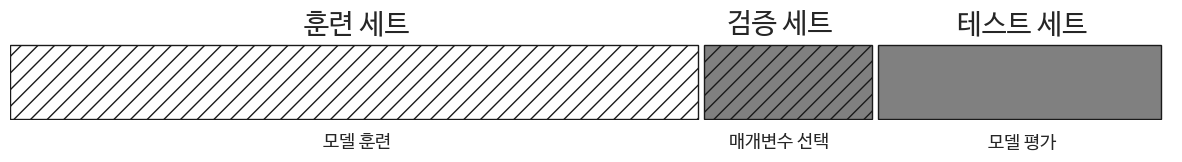

In [5]:
mglearn.plots.plot_threefold_split()

# 5.3 평가 지표와 측정
지금까지 분류 성능 평가에 정확도를 사용했고, 회귀 성능 평가에는 R^2을  사용했다. 그러나 주어진 데이터셋에 대한 지도 학습모델의 성능을 재는 방법은 그 외에도 많다.실전에서 애플리게이션에 따라 이런 평가 지표가 적합하지 않을 수 있으므로 모델을 선택하고 매개변수를 튜닝할 때 올바른 지표를 선택하는 것이 중요하다.

\
### 5.3.1 최종 목표를 기억하라
평가 지표를 선택할 때 머신러닝 앱의 최종 목표를 기억해야 한다.예특을 만드는 것 뿐 아니라 큰 의사 결정 프로세세의 일부로 사용는 데 더 중점을 둬야 할지 모른다. 머신러닝 지표를 선택하기 전에 비즈니스 지표라고 부르는 앱의 고차원적인 목표를 생각해야 한다. 지표에 긍정적인 영향을 주는 모델과 매게변수 선택은 이를 바탕으로 한다. 많은 경우 특정 모데리이 비즈니스에 미치는 영향은 실제 시스템을 적용해야 알 수 있다. 가령 고객 수가 10% 증가했어도  고객당 매출이 15% 줄어들 수 있다.

\
### 5.3.2 이진 분류의 평가 지표
이진 분류에는 양성 클래스와 음성클래스가 있고 우리의 관심은 양성 클래스이다. 암의 경우 진단에 있어 거짓 양성과 음성이 나올 수 있는데, 특히 주의해야 할 것은 암을 발견 못해 치료가 늦어지도록 하는 '거짓음성'일 것이다.

\
#### 불균형 데이터셋
앱에선 광고 클릭을 유도한다. 하지만 사람들에 클릭을 유도하기 위한 데이터는, 불균형 데이터셋이다. (100개의 광고중 1개만 클릭한다) 현실은 이와 같이 불균형 데이터 셋이 대부분이다. 만약 아무 모델이나 선택해도 '클릭 아님'을 예측한다면 그 모델은 99% 성능을 낼것이고 그 모델은 '좋은 모델'인지 알 수 없을 것이다.



In [6]:
# 9:1 불균형 데이터셋
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [7]:
# 다수의 클래스를 예측값으로 내놓는 DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 레이블:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블: [False]
테스트 점수: 0.90


거의 아무학습을 하지 않고도 90%정확도를 가졌다. 자기 모델의 정확도가 90%라고 좋아할 것이 아니다. 추세장에선 누구나 정확도가 90%가 되기도 한다.
주식도 기본 최소 정확도는 50%부터다. 다만 발생하는 수수료, 수익손해 포인트가 일치할 경우 확률 50%는, 0이라는 기본값을 향한다는 사실만 다르지만.

In [8]:
# 실제 분류기를 사용한것
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [9]:
# 무작위 예측, 더비가 확실이 결과가 좋지 않다.
# 그래도 80% 맞췄다.

# 불균형데이터셋 유용성 판단 평가지표가 필요하다.

from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy score: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg score: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


### 오차 행렬

이진 뷴류 평가 결과를 나타낼 때 가장 널리 사용되는 방법

In [10]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('오차행렬: \n', confusion)

오차행렬: 
 [[402   1]
 [  6  41]]


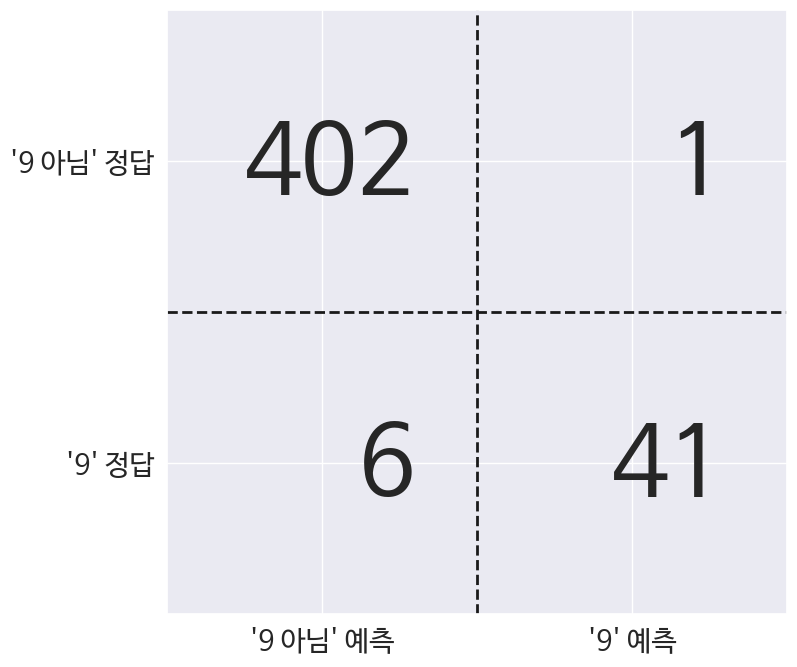

In [11]:
mglearn.plots.plot_confusion_matrix_illustration()

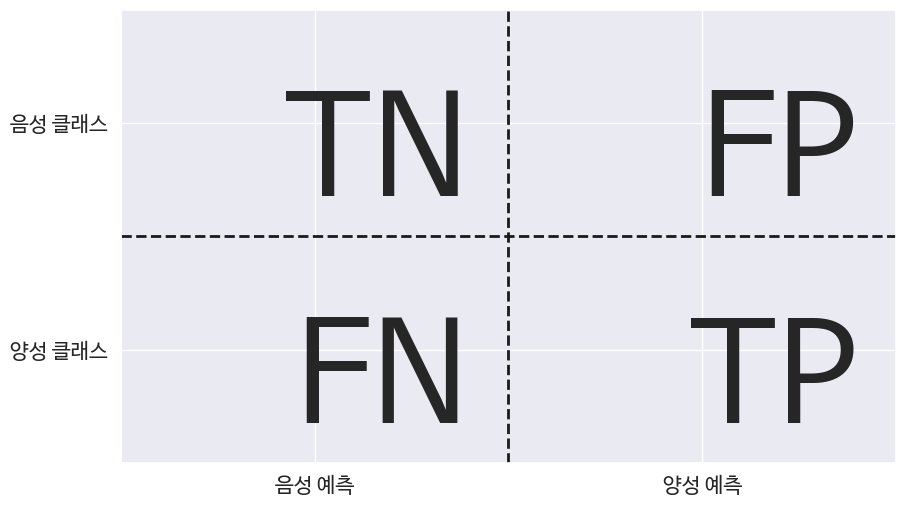

In [12]:
mglearn.plots.plot_binary_confusion_matrix()

In [13]:
# 오차 행렬 사용 앞서 만든 모델들 
# 더미 모델 두개, 결정트리, 로지트틱회귀을 비교해 보겠다

print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n 무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n 결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n 로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

 무작위 더미 모델:
[[357  46]
 [ 43   4]]

 결정 트리:
[[390  13]
 [ 24  23]]

 로지스틱 회귀
[[402   1]
 [  6  41]]



- 빈도 기반 은 잘못된 것이 확실하다 모두 음성으로 본다.
- 무작위는 거짓이 많다.
- 결정 트리는 위에것들 보단 낫다
- 로지스틱은 가장낫다. 그러나 전체 오차 행렬을 조사하기에 조금 번거롭다.


## 정밀도, 재현율, f점수

- 정밀도 : 거짓 양성 줄이기 (신약 개발 임상실험 줄이기 위해)
- 재현율 : 거짓 음성 줄이기 (암환자 암진단 실수 줄이기 위해)
- f-점수 : 둘 모두 봐야 천테 그림을 볼 수 있다.

\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

In [14]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1 socre: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('무작위 더미 모델의 f1 score: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('트리 모델의 f1 socre: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 socre: {:.2f}'.format(f1_score(y_test, pred_logreg)))


빈도 기반 더미 모델의 f1 socre: 0.00
무작위 더미 모델의 f1 score: 0.08
트리 모델의 f1 socre: 0.55
로지스틱 회귀 모델의 f1 socre: 0.92


f1 점수는 정확도보다 이야하거나 설명하기 어렵다는 단점이 있다. classification_report  함수는 정밀도, 재현율, f1 점수 모두를 한번에 계산해서 깔끔하게 출력해준다

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['fake 9', 'true 9'], zero_division=0))

              precision    recall  f1-score   support

      fake 9       0.90      1.00      0.94       403
      true 9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [16]:
print(classification_report(y_test, pred_dummy, target_names=['fake 9', 'true 9'], zero_division=0))

              precision    recall  f1-score   support

      fake 9       0.89      0.89      0.89       403
      true 9       0.08      0.09      0.08        47

    accuracy                           0.80       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.81      0.80      0.80       450



In [17]:
print(classification_report(y_test, pred_logreg, target_names=['fake 9', 'true 9'], zero_division=0))

              precision    recall  f1-score   support

      fake 9       0.99      1.00      0.99       403
      true 9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



어떤 평가지표를 사용하느냐에 따라 점수 차이가 크다.

\
### 불확실성 고려

오차 행령과 분류 이포트가 예측 결과를 자세히 분석할 수 있도록 도와준다. 하지만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태이다.


In [18]:
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

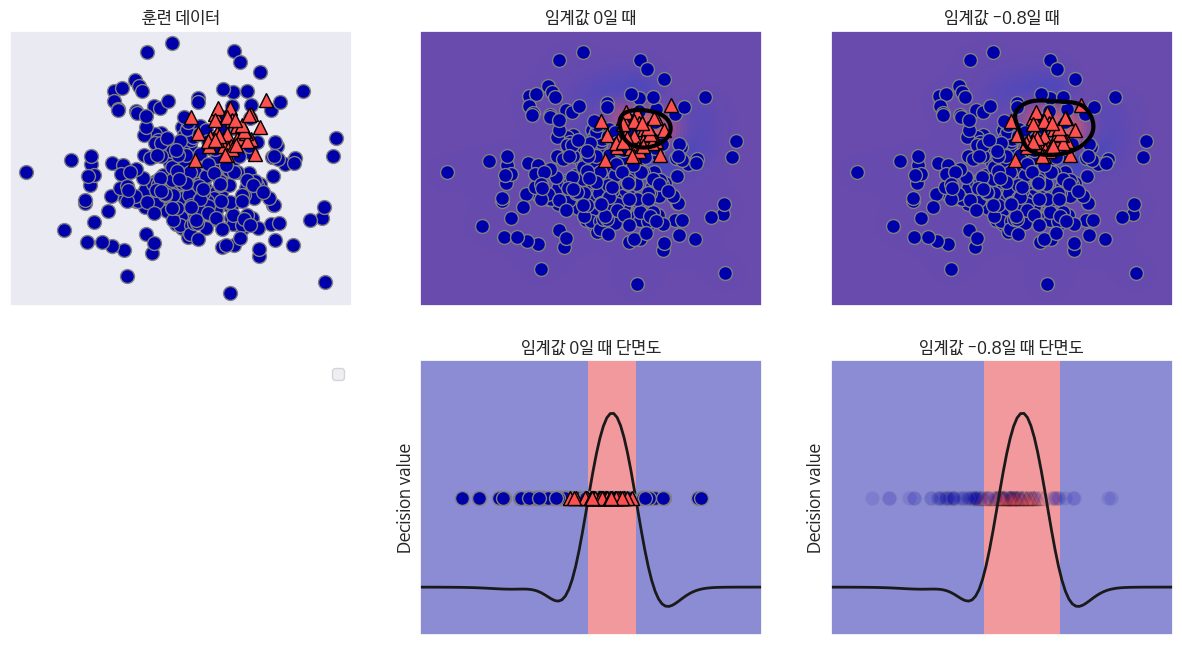

In [19]:
mglearn.plots.plot_decision_threshold()

In [20]:
# 정밀도 재현율 평가

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [21]:
# 가정 암진단 처럼 재현율을 높여야 한다면, 가짜 음성을 줄이기 위해 거짓양성 증가를 감수한다.
# 잘못 분류된 1을 증가,  잘못된 0 감소 시키기 위해 임계값을 낮춘다.
y_pred_low_threshold = svc.decision_function(X_test) > -.8

In [22]:
print(classification_report(y_test, y_pred_low_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



정밀도 낮아졌고 재현율 올랐다. 실전에는 임계 값을 선택할때 테스트셋을 사용하지 않도록 유의햐야 한다. 임계값 설정에 테스트셋을 사용하면 과도하게 낙관적인 결과를 만들 가능성이 높기 때문이다. 검증세트나 교차검증을 사용하자.

### 정밀도 재현율 고정, 운영포인트. 운영포인트를 명확히하기 위한 정밀도 재현율 곡선(ROC 곡선) 


In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

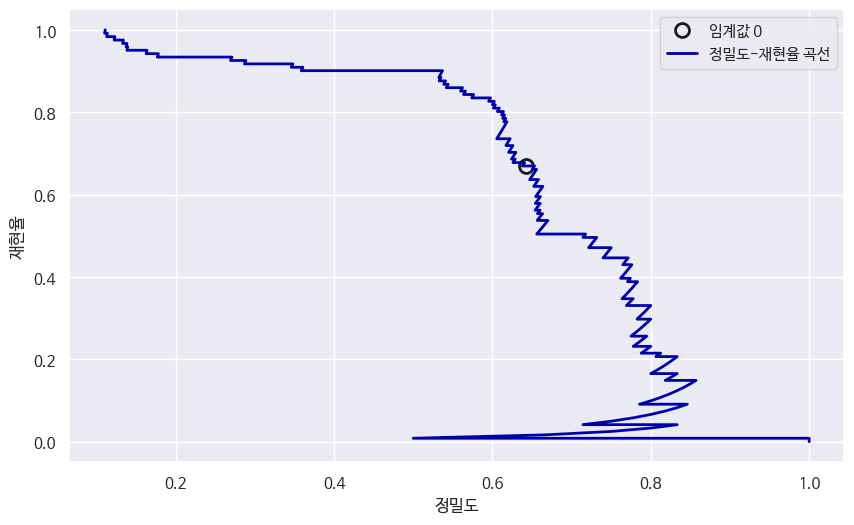

In [24]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘린다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', fillstyle= 'none', c='k', mew=2)
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

분류기기 다르면 곡선의 다른 부분에서 장점이 생긴다. 운영포인트가 달라진다.
같은데이터 셋으로 훈련한 램덤, svm을 비교해 본다.

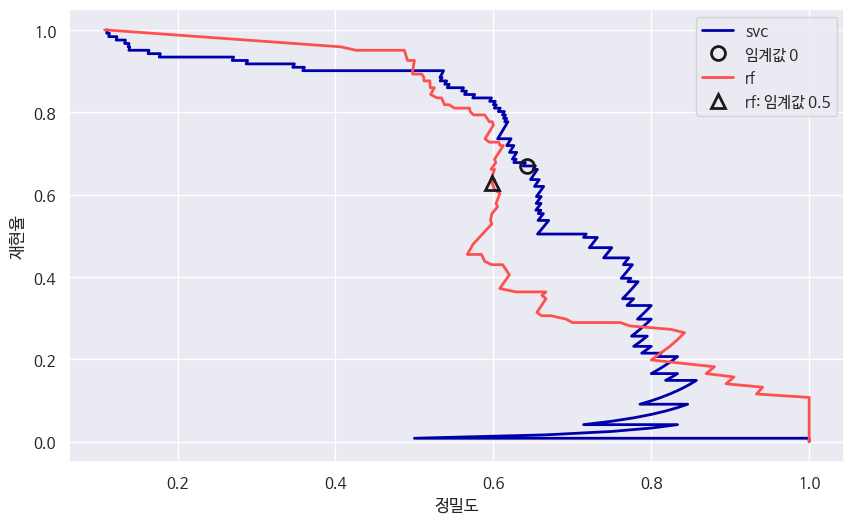

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 dicision_function 대신 predict_proba를 제공한다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', fillstyle= 'none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf -0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label='rf: 임계값 0.5', fillstyle= 'none', c='k', mew=2)

plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

재현율이 매우 높고나 정밀도가 매우 높을 때에는 램덤이 더 낫다. f1 점수만 봤다면 이점을 놓혔을 수 있다. f1 점수는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수다.

In [26]:
print('램덤 포레스트의 f1_score: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('svc의 f1_score: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

램덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


평균 정밀도는, 정밀도-재현율 곡선아내 부분의 면적이다.

In [27]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('rf_average_precision_score: {:.3f}'.format(ap_rf))
print('svc_average_precision_score: {:.3f}'.format(ap_svc))

rf_average_precision_score: 0.660
svc_average_precision_score: 0.666


f1 점수는 차이가 나지만 f1 면적에서 차이가 미미한 것으로 보아 극단값에서는 rf가 
더 좋았다는 것을 알 수 있다.

### ROC 와 AUC 
ROC 곡선은 여러 임계값에서 분류기의 특성을 분석하는 데 너리 사용하는 도구다. 정밀도-재현율 곡선과 비슷하게 분류기의 모든 입개값을 고려하지만, 정밀도와 재현율 대신 진짜양성비율에 대한 거짓양성비율을 나타낸다.


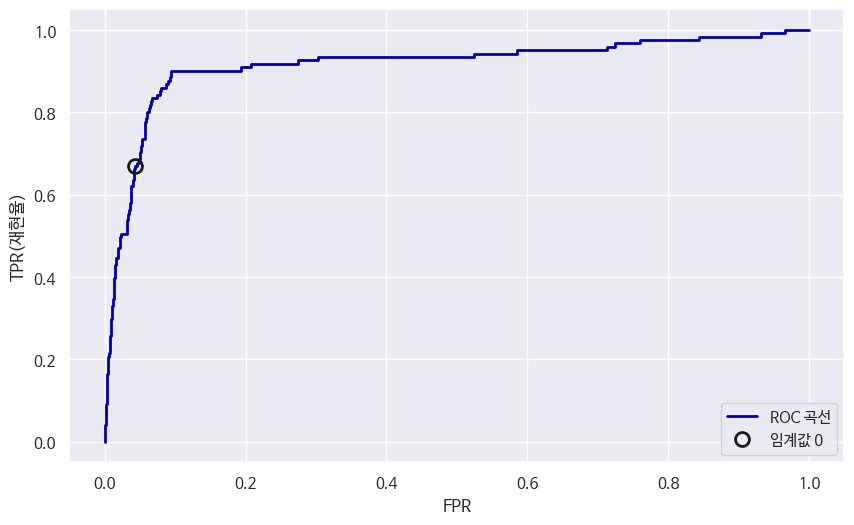

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR(재현율)')

# 0 근처 임계값을 찾는다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)


ROC 곡선은 왼쪽위에 가까울 수록 이상적이다. 램덤 포레스트와 SVM의 ROC 곡선을 비교하자

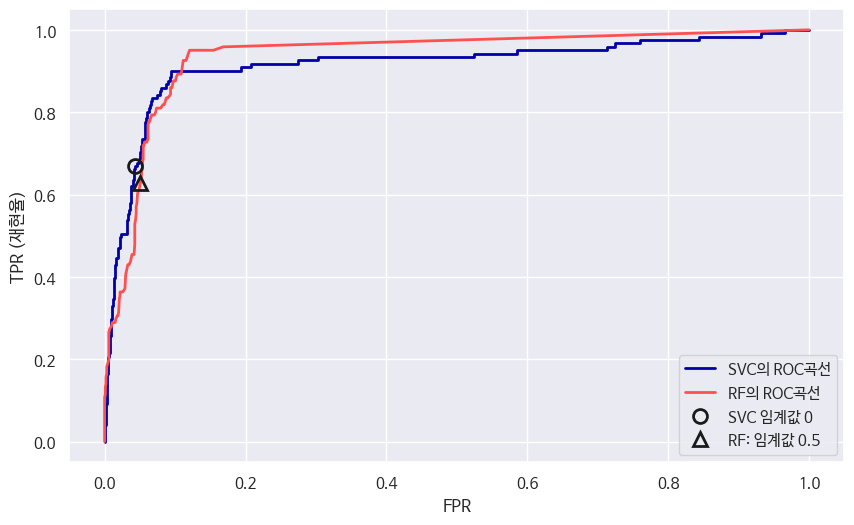

In [29]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='SVC의 ROC곡선')
plt.plot(fpr_rf, tpr_rf, label='RF의 ROC곡선')

plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='SVC 임계값 0', fillstyle= 'none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf -0.5))

plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label='RF: 임계값 0.5', fillstyle= 'none', c='k', mew=2)

plt.legend(loc=4)

정밀도-재현율 곡선처럼 곡선 아래의 면적값 하나로 ROC 곡선을 요약할 때가 많다. 이 면적은 AUC라고 한다.
roc_auc_score 함수로 계산한다

In [30]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('랜덤 포레스트의 AUC: {:.3f}'.format(rf_auc))
print('SVC의 AUC: {:.3f}'.format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


불균형 데이터의 경우 AUC를 이용하자.

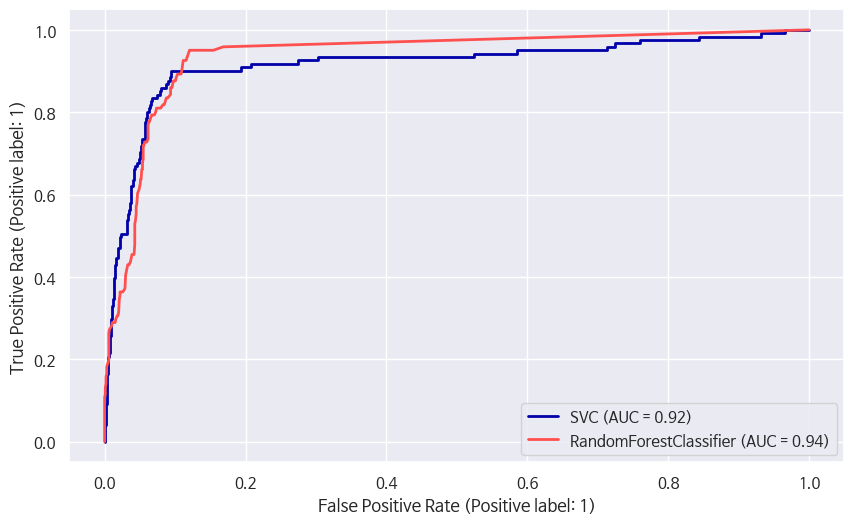

In [31]:
# 대채됨
# plot_roc_curve > RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# RF
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()


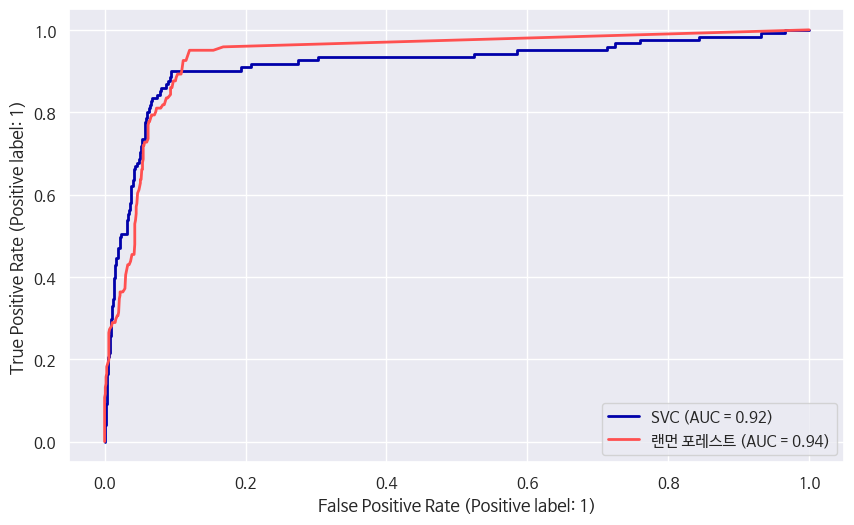

In [32]:
# 다른 버전
fig ,ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), name='SVC', ax=ax)
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:,1], name='랜먼 포레스트', ax=ax)
plt.show()

gamma = 1.00 정확도 = 0.90 AUC = 0.5:.2f
gamma = 0.10 정확도 = 0.90 AUC = 0.9582387413547332:.2f
gamma = 0.01 정확도 = 0.90 AUC = 0.999524840293543:.2f


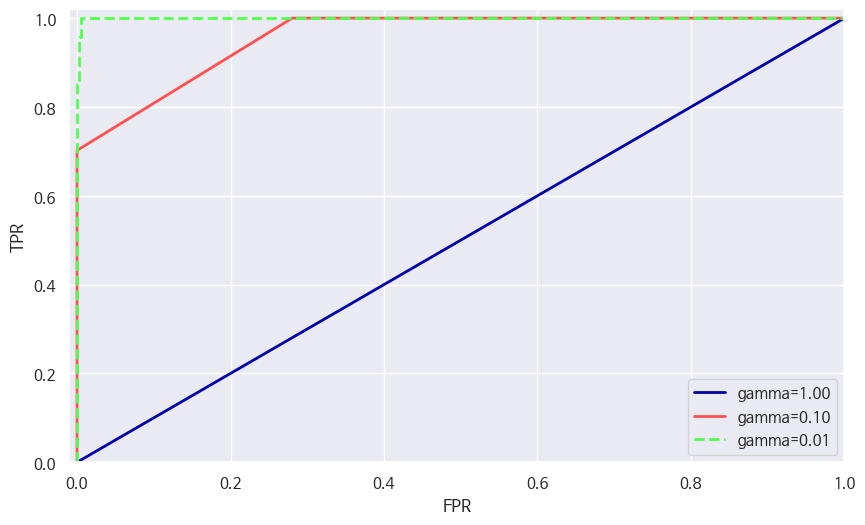

In [33]:
# digit 데이터셋에서 9와 다른 숫자를 구분하는 문제 ㅅ다시
# 커널 폭 gamma 각기 다르게 SVM 데이터셋 적용

y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
  svc = SVC(gamma=gamma).fit(X_train, y_train)
  accuracy = svc.score(X_test, y_test)
  auc = roc_auc_score(y_test, svc.decision_function(X_test))
  fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
  print('gamma = {:.2f} 정확도 = {:.2f} AUC = {}:.2f'.format(gamma, accuracy, auc))
  plt.plot(fpr, tpr, label='gamma={:.2f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')


같은 정밀도 이지만. auc를 보면 차이가 많이 난다. 그렇기 때문에 적절한 임계값을 찾기 위해 auc를 이용할 줄 알아야 한다.

### 5.3.3 다중 분류의 평가 지표

이진 분류 뿐 아니라 클래스가 더 많은 다중 분류를 다뤄보자.
가령 a,b,c 세 클래스가 있고 비율이 85 : 10 : 5 라면 어떨까.

\
예시를 위해 digits 데이터셋에 10개 손글씨 분류를 적용해보겠다.

In [34]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print('정확도: {:.3f}'.format(accuracy_score(y_test, pred)))
print('오차 행렬: \n', confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬: 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


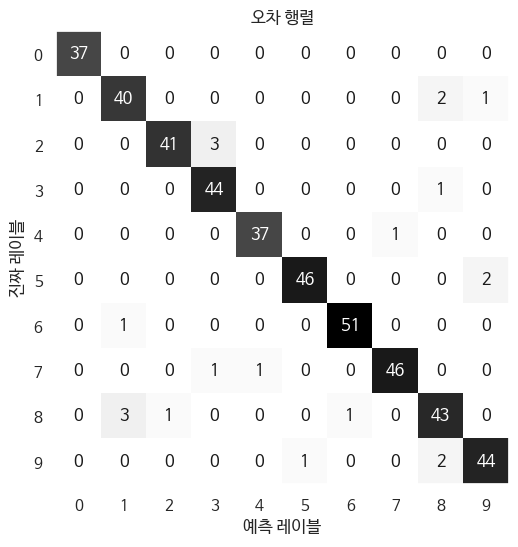

In [35]:
# 시각화
score_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')

plt.title('오차 행렬')
plt.gca().invert_yaxis()

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [37]:
print("micro mean f1 score: {:.3f}".format(f1_score(y_test, pred, average='micro')))
print("macro mean f1 score: {:.3f}".format(f1_score(y_test, pred, average='macro')))

micro mean f1 score: 0.953
macro mean f1 score: 0.954


### 5.3.4 회귀의 평가지표

회귀 평가는 분류에서와 비슷하게 할 수 있다. 예를 들면, 타깃을 과대 예측한 것 대비 과소 예측한 것을 분석한다. 그러나 대부분의 애플리케이션에서는 회귀 추정기의 R^2 만으로 충분하다. 가끔 평균 제곱 에러나 평균 절댓값 에러를 사용하여 모델을 튜닝할때 이런 지료를 기반으로 비스지스 결정을 할 수 있다. 그러나 일반적으로 R^2 이 회귀 모델을 평가하는데 더 나은 지표이다.

\
### 5.3.5 모델 선택에서 평가 지표 사용하기
평가 방법과 그 방법들을 주어진 타깃 값과 모델에 어떻게 적용하는지 자세히 다루었다. 

In [38]:
# 분류의 기본 평가 지표는 정확도 이다.
print('기본 평가 지표:',
      cross_val_score(SVC(), digits.data, digits.target== 9, cv= 5))
# scorling='accuracy' 의 결과는 다음과 같다.
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target== 9, 
                                    scoring='accuracy', cv= 5)
print('정확도 지표:', explicit_accuracy)
roc_auc = cross_val_score(SVC(), digits.data, digits.target== 9, 
                                    scoring='roc_auc', cv= 5)
ap = cross_val_score(SVC(), digits.data, digits.target== 9, 
                                    scoring='average_precision', cv= 5)

print('평균 정밀도 지표:', ap)
print('ROC-AUC 지표:', roc_auc)


기본 평가 지표: [0.975 0.992 1.    0.994 0.981]
정확도 지표: [0.975 0.992 1.    0.994 0.981]
평균 정밀도 지표: [0.976 0.989 1.    0.999 0.95 ]
ROC-AUC 지표: [0.997 0.999 1.    1.    0.984]


In [39]:
# cross_validate 함수를 사용하면 한 번에 여러 측정지표를 계산할 수 있다.
from sklearn.model_selection import cross_validate
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=['accuracy', 'roc_auc', 'recall_macro'], 
                     return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.02,0.02,0.97,0.99,1.00,1.0,0.89,0.97
1,0.02,0.01,0.99,1.00,1.00,1.0,0.96,0.98
2,0.02,0.01,1.00,1.00,1.00,1.0,1.00,0.98
3,0.02,0.01,0.99,1.00,1.00,1.0,0.97,0.98
4,0.02,0.01,0.98,1.00,0.98,1.0,0.90,0.99


In [40]:
from sklearn.model_selection import GridSearchCV

# 비슷하게 GridSearchCV 에서 최적의 매개변수를 선택하기 위한 평가 지표를 바꿀 수 있다.
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0
)

# 일부러 적절하지 않는 그리드를 만든다.
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1,10]}
# 기본 정확도 측정 지표를 사용한다.
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
print('정확도 지표를 사용한 그리드 서치')
print('최적의 파리미터:', grid.best_params_)
print('최상의 교차 검증 점수(정확도): {:.3f}'.format(grid.best_score_))
print('테스트셋 평균 정밀도: {:.3f}'.format(average_precision_score(y_test, grid.decision_function(X_test))))
print('테스트셋 정확도: {:.3f}'.format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파리미터: {'gamma': 0.0001}
최상의 교차 검증 점수(정확도): 0.972
테스트셋 평균 정밀도: 0.966
테스트셋 정확도: 0.973


In [41]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (평균 정밀도): 0.988
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896


정확도를 사용할 땐 gamma=0.001이 선택되지만, 평균 정밀도를 사용하면 gamma=0.01이 선택된다. 두 경우 모두 교차 검증 점수가 테스트 세트에 대한 결과와 일치한다. 평균 정밀도를 최적화 하기 위해 찾은 매개변수에서는 테스트 셋의 평균 정밀도가 더 높다. 반변 정확도를 최적하하기 위해 찾은 매개변수에서는 테스트 세트의 정확도가 더 높다. 

### 5.4 요약 및 정리

이번 장에서 교차 검증, 그리드 서치, 평가 지쵸와 머신러닝 알고리즘을 평가하고 개선하기 위한 기초 사항을 살펴보았다. 이 장에서 논의한 도구들과 2,3장에서 나온 알고리즘들은 모든 머신러닝 개발자의 필수 도구이다.
초보 기술자가 간과하기 쉽기 때문에 이 장에서 나온 주의 사항 두 개를 다시 환기해보겠다. 
1. 교차검증을 해야한다. 교차 검즈 또는 테스트 세트를 사용하면 머신러닝 모델의 미래 성능을 평가할 수 있다. 하지만 테스트 세트나 교차 검증을 모델이나 모델의 매개변수 선택에 사용하면 (테스트 데이터를 써버렸기 때문에) 테스트 데이터로 미래 성능을 평가한다면 매우 낙관적인 결과가 나와 적절하지 않다. 그러므로 모델 학습에는 훈련 데이터로, 모델과 매개변수 선택에는 검증 데이터로, 모델 평가에는 테스트 데이터로 분리 사용해야 한다. 그리고 간단하게 분할하는 대신 교차 검증으로 분할을 반복해야 한다. 가장 널리 사용하는 구성은 훈련셋과 테스트셋으로 분할하고 모델과 모델 매개변수 선택을 위해 훈련셋에 교차 검증을 적용하는 방식이다.
2. 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다. 머신러닝 모델의 예측으로부터 비즈니스 겨정을 내리는 이론은 이 책에서 다루지 않는다. 그러나 머신러닝 작업의 최종 목적이 높은 정확도의 모델을 만드는 데어서 끝나지 않는 다는 걸 알아야 한다. 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야 한다. 실전에서는 분류 문제에 균형 잡힌 클래스를 가진 경우가 거의 없고, 거짓 양성과 거짓음성이 분류 문제에 큰 영향을 미친다. 이런 영향을 이해하고 적절한 평가 지표를 선택해야 한다.

\
지금까지 언급한 모델 평가와 선택 기술은 데이터 과학자의 도구 상자에서 가장 중요한 것들이다. 이 장에서 설명한 그리드 서치와 교차 검증은 지도 학습 모델 하나에만 적용했다 .그러나 우리가 보았듯 많은 모델이 전처리를 필요로 한다. 3장의 얼굴 인식의 예와같이 어떤 앱은 데이터의 표현을 다르게 만드는 것이 도움이 된다. 다음은 이런 알고리즘을 연결하여 그리드 서치와 교차 검증을 사용할 수 있는 Pipeline 기능을 보겠다.